In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Get the data

In [32]:
movies = pd.DataFrame.from_csv('2013_movies.csv')

# Challenge 1

In [33]:
def change_to_pd_time():
    movies['ReleaseDate'] = movies['ReleaseDate'].map(lambda x: pd.to_datetime(x))
change_to_pd_time()

In [78]:
def plot_x_v_y(axis1, 
               axis2, 
               title='Title', 
               labelx='x axis', 
               labely='y axis',
              color='b'):    
    x = axis1
    y = axis2
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    plt.scatter(x, y, color=color)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.suptitle(title)

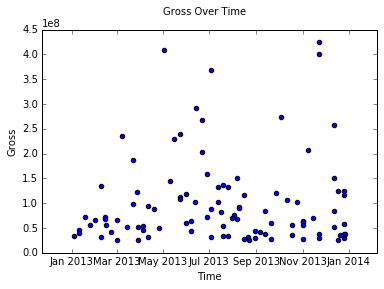

In [48]:
plot_x_v_y(movies['ReleaseDate'], 
          movies['DomesticTotalGross'], 
          title='Gross Over Time',
          labelx='Time',
          labely='Gross')

# Challenge 2

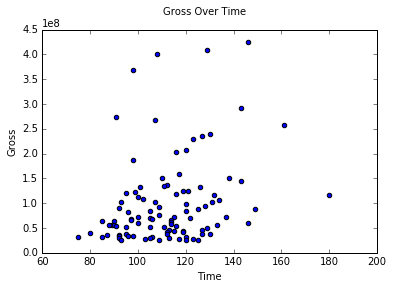

In [49]:
plot_x_v_y(movies['Runtime'], 
          movies['DomesticTotalGross'], 
          title='Gross Over Time',
          labelx='Time',
          labely='Gross')

# Challenge 3

In [54]:
movies.groupby('Rating').mean().round(2)

,Budget,DomesticTotalGross,Runtime
Rating,,,
G,NaN,2.684928e+08,107.00
PG,93933333.33,1.311357e+08,99.93
PG-13,96609756.10,1.114498e+08,117.51
R,38863636.36,6.989243e+07,110.73


# Challenge 4

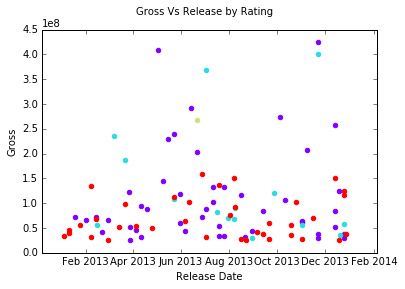

In [81]:
ratings = movies['Rating'].unique()
colors = cm.rainbow(np.linspace(0, 1, len(ratings)))
# for rating, c in zip(ratings, colors):
#     plt.scatter(x, y, color=c)
    
for rating, c in zip(ratings, colors):
    x = movies[movies['Rating'] == rating]['ReleaseDate']
    y = movies[movies['Rating'] == rating]['DomesticTotalGross']
    plot_x_v_y(x, y, 
              title='Gross Vs Release by Rating',
              labelx='Release Date',
              labely='Gross',
              color=c)
    

# Challenge 5

In [88]:
movies.groupby('Director')['DomesticTotalGross']\
.mean().sort_values(ascending=False).iloc[0:5]

Director
Francis Lawrence             424668047
Shane Black                  409013994
Chris BuckJennifer Lee       400738009
Pierre CoffinChris Renaud    368061265
Zack Snyder                  291045518
Name: DomesticTotalGross, dtype: int64

Challenge 6

In [91]:
movies['month_binned'] = movies.ReleaseDate.map(lambda x: x.month)

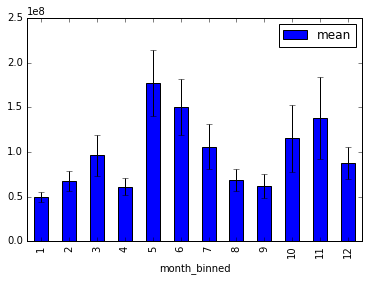

In [110]:
movies.groupby('month_binned')['DomesticTotalGross']\
.agg([np.mean, lambda x: np.std(x)/np.sqrt(len(x))]).plot(kind='Bar', yerr='<lambda>')

These seem reasonable.  The standard error of the mean is 

$$\frac{\sigma}{\sqrt{n}}$$

Where n is the number of samples
